# Evaluation

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator

def fillna(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    df['Fare'] = df['Fare'].fillna(0)
    return df

def drop_feature(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_feature(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    return df

def transform_feature(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_feature(df)
    return df

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        y_hat = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: y_hat[i] = 0
            else: y_hat[i] = 1
        return y_hat

df = pd.read_csv('c:/Example/train.csv')
df = transform_feature(df)
y = df['Survived']
X = df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

mdc = MyDummyClassifier()
mdc.fit(X_train, y_train)
y_hat = mdc.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.7877094972067039


In [5]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((X.shape[0], 1), dtype='int32')
                
digits = load_digits()
y = (digits.target == 7).astype('int32')

X_train, X_test, y_train, y_test = train_test_split(digits.data, y)
print(y_test.shape)
print(pd.Series(y_test).value_counts())

mfc = MyFakeClassifier()
mfc.fit(X_train, y_train)
y_hat = mfc.predict(X_test)
print(accuracy_score(y_test, y_hat))

(450,)
0    404
1     46
Name: count, dtype: int64
0.8977777777777778


In [7]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_hat))

[[404   0]
 [ 46   0]]


In [15]:
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('c:/Example/train.csv')
df = transform_feature(df)
y = df['Survived']
X = df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

print(accuracy_score(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat))

0.7932960893854749
[[97 13]
 [24 45]]
0.7758620689655172
0.6521739130434783


In [16]:
probs = lr.predict_proba(X_test)
result = np.concatenate([probs, y_hat.reshape(-1, 1)], axis=1)
print(result)

[[0.7019296  0.2980704  0.        ]
 [0.66803816 0.33196184 0.        ]
 [0.91380689 0.08619311 0.        ]
 [0.49705693 0.50294307 1.        ]
 [0.89655355 0.10344645 0.        ]
 [0.11945727 0.88054273 1.        ]
 [0.89949136 0.10050864 0.        ]
 [0.93623295 0.06376705 0.        ]
 [0.28831987 0.71168013 1.        ]
 [0.88177431 0.11822569 0.        ]
 [0.35671328 0.64328672 1.        ]
 [0.78856111 0.21143889 0.        ]
 [0.64293016 0.35706984 0.        ]
 [0.84701047 0.15298953 0.        ]
 [0.7269239  0.2730761  0.        ]
 [0.86013074 0.13986926 0.        ]
 [0.86170273 0.13829727 0.        ]
 [0.2295673  0.7704327  1.        ]
 [0.86226699 0.13773301 0.        ]
 [0.86526004 0.13473996 0.        ]
 [0.81468036 0.18531964 0.        ]
 [0.88118627 0.11881373 0.        ]
 [0.77282629 0.22717371 0.        ]
 [0.28450102 0.71549898 1.        ]
 [0.19477097 0.80522903 1.        ]
 [0.89150026 0.10849974 0.        ]
 [0.29442743 0.70557257 1.        ]
 [0.8875512  0.1124488  0.  

In [17]:
from sklearn.preprocessing import Binarizer

tmp = [[1, -1, 2],
       [2, 0, 0],
       [0, 1.1, 1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(tmp))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
y_prob = probs[:, 1].reshape(-1, 1)

y_hat = Binarizer(threshold=0.5).fit_transform(y_prob)
print(accuracy_score(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat))


0.7932960893854749
[[97 13]
 [24 45]]
0.7758620689655172
0.6521739130434783


In [21]:
for th in [0.4, 0.45, 0.5, 0.55, 0.6]:
    y_hat = Binarizer(threshold=th).fit_transform(y_prob)
    print(accuracy_score(y_test, y_hat))
    print(confusion_matrix(y_test, y_hat))
    print(precision_score(y_test, y_hat))
    print(recall_score(y_test, y_hat))
    print('-----------------------------')

0.776536312849162
[[93 17]
 [23 46]]
0.7301587301587301
0.6666666666666666
-----------------------------
0.7821229050279329
[[95 15]
 [24 45]]
0.75
0.6521739130434783
-----------------------------
0.7932960893854749
[[97 13]
 [24 45]]
0.7758620689655172
0.6521739130434783
-----------------------------
0.7932960893854749
[[99 11]
 [26 43]]
0.7962962962962963
0.6231884057971014
-----------------------------
0.7988826815642458
[[102   8]
 [ 28  41]]
0.8367346938775511
0.5942028985507246
-----------------------------


In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, ths = precision_recall_curve(y_test, y_prob)

N = ths.shape[0]
index = np.arange(0, N, 15)

print(index)
print(ths[index])
print(precisions[index])
print(recalls[index])

[  0  15  30  45  60  75  90 105 120 135 150 165]
[0.06330138 0.10451834 0.11864206 0.13468098 0.14825633 0.18816062
 0.28752003 0.36396414 0.5538395  0.68960818 0.75430435 0.89963392]
[0.38547486 0.41463415 0.45637584 0.49618321 0.55652174 0.60606061
 0.65060241 0.67647059 0.81132075 0.86842105 1.         1.        ]
[1.         0.98550725 0.98550725 0.94202899 0.92753623 0.86956522
 0.7826087  0.66666667 0.62318841 0.47826087 0.33333333 0.11594203]


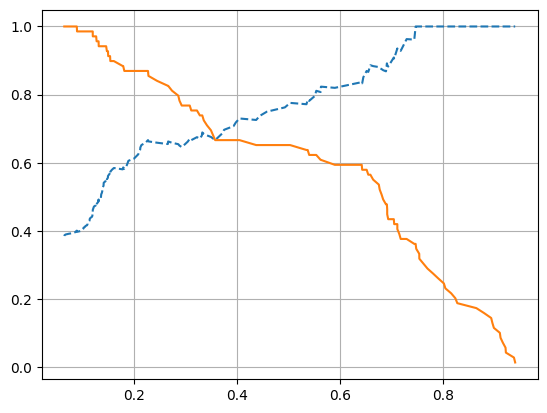

In [23]:
import matplotlib.pyplot as plt

plt.plot(ths, precisions[:N], '--')
plt.plot(ths, recalls[:N])
plt.grid()

In [24]:
from sklearn.metrics import f1_score
for th in [0.4, 0.45, 0.5, 0.55, 0.6]:
    y_hat = Binarizer(threshold=th).fit_transform(y_prob)
    print(accuracy_score(y_test, y_hat))
    print(confusion_matrix(y_test, y_hat))
    print(precision_score(y_test, y_hat))
    print(recall_score(y_test, y_hat))
    print(f1_score(y_test, y_hat))
    print('-----------------------------')

0.776536312849162
[[93 17]
 [23 46]]
0.7301587301587301
0.6666666666666666
0.696969696969697
-----------------------------
0.7821229050279329
[[95 15]
 [24 45]]
0.75
0.6521739130434783
0.6976744186046512
-----------------------------
0.7932960893854749
[[97 13]
 [24 45]]
0.7758620689655172
0.6521739130434783
0.7086614173228347
-----------------------------
0.7932960893854749
[[99 11]
 [26 43]]
0.7962962962962963
0.6231884057971014
0.6991869918699186
-----------------------------
0.7988826815642458
[[102   8]
 [ 28  41]]
0.8367346938775511
0.5942028985507246
0.6949152542372882
-----------------------------


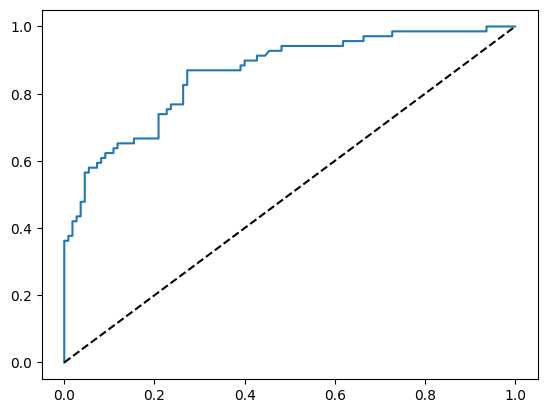

In [25]:
from sklearn.metrics import roc_curve

fprs, tprs, ths = roc_curve(y_test, y_prob)
plt.plot(fprs, tprs)
plt.plot([0, 1], [0, 1], 'k--')

In [26]:
from sklearn.metrics import roc_auc_score

print(accuracy_score(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat))
print(f1_score(y_test, y_hat))
print(roc_auc_score(y_test, y_prob))

0.7988826815642458
[[102   8]
 [ 28  41]]
0.8367346938775511
0.5942028985507246
0.6949152542372882
0.8604084321475626
